# A survey on the general concept of diabetes among villagers of different villages in Bangladesh.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import researchpy as rp 
sns.set_style('whitegrid')
pd.set_option('display.max_rows', 500)

In [3]:
df = pd.read_excel('./data/modified.xlsx')
df.head(2) 

,Participants,Name,Age,Gender,Village,Thana,Distric,Do you have any disease?,Which medications do you take regularly?,Do you have diabetes?,...,"In a typicalweek, on how many days do you do engaged-intensity activities as part of your work?",How much time do you spend doing engaged-intensity activities at work on a typical day?,Do you walk for at least 10 minutes continuously to get to and from places?,"In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?","In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?","How much time do you spend doing sports, fitness or recreational activities on a typical day?",How many hours sleep in a whole day?,How many hours sleep in NIGHT time?,How many hours sleep in NAP time?,Have you felt disturbance in your sleep at night?
0,1,Akbar mondol,70,M,Shablat,Shalikha,Magura,N,N,N,...,0,0,Y,3,0,0,6,6,0,N
1,2,Momena khatun,65,F,Shablat,Shalikha,Magura,"Asthama, CVD",N,N,...,0,0,N,0,0,0,8,8,0,N


## Data Preprocessing 

In [4]:
# replace with N = No, Y = Yes 
df.replace({'Y': 'Yes', 'N': 'No'}, inplace=True)
df.head()

,Participants,Name,Age,Gender,Village,Thana,Distric,Do you have any disease?,Which medications do you take regularly?,Do you have diabetes?,...,"In a typicalweek, on how many days do you do engaged-intensity activities as part of your work?",How much time do you spend doing engaged-intensity activities at work on a typical day?,Do you walk for at least 10 minutes continuously to get to and from places?,"In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?","In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?","How much time do you spend doing sports, fitness or recreational activities on a typical day?",How many hours sleep in a whole day?,How many hours sleep in NIGHT time?,How many hours sleep in NAP time?,Have you felt disturbance in your sleep at night?
0,1,Akbar mondol,70,M,Shablat,Shalikha,Magura,No,No,No,...,0,0,Yes,3,0,0,6,6,0,No
1,2,Momena khatun,65,F,Shablat,Shalikha,Magura,"Asthama, CVD",No,No,...,0,0,No,0,0,0,8,8,0,No
2,3,Ratna khatun,35,F,Shablat,Shalikha,Magura,No,No,No,...,7,6,Yes,7,0,0,6,6,0,No
3,4,Saijoddi rahman,38,M,Shablat,Shalikha,Magura,No,No,No,...,7,5,Yes,7,0,0,7,7,0,No
4,5,Uzzal,32,F,Shablat,Shalikha,Magura,Night fever,No,No,...,7,5,Yes,7,0,0,6,6,0,No


In [5]:
# replace with F = Female, M = Male 
df.replace({'F': 'Female', 'M': 'Male'}, inplace=True)
df.head()

,Participants,Name,Age,Gender,Village,Thana,Distric,Do you have any disease?,Which medications do you take regularly?,Do you have diabetes?,...,"In a typicalweek, on how many days do you do engaged-intensity activities as part of your work?",How much time do you spend doing engaged-intensity activities at work on a typical day?,Do you walk for at least 10 minutes continuously to get to and from places?,"In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?","In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?","How much time do you spend doing sports, fitness or recreational activities on a typical day?",How many hours sleep in a whole day?,How many hours sleep in NIGHT time?,How many hours sleep in NAP time?,Have you felt disturbance in your sleep at night?
0,1,Akbar mondol,70,Male,Shablat,Shalikha,Magura,No,No,No,...,0,0,Yes,3,0,0,6,6,0,No
1,2,Momena khatun,65,Female,Shablat,Shalikha,Magura,"Asthama, CVD",No,No,...,0,0,No,0,0,0,8,8,0,No
2,3,Ratna khatun,35,Female,Shablat,Shalikha,Magura,No,No,No,...,7,6,Yes,7,0,0,6,6,0,No
3,4,Saijoddi rahman,38,Male,Shablat,Shalikha,Magura,No,No,No,...,7,5,Yes,7,0,0,7,7,0,No
4,5,Uzzal,32,Female,Shablat,Shalikha,Magura,Night fever,No,No,...,7,5,Yes,7,0,0,6,6,0,No


In [6]:
# number of rows and columns 
df.shape 

(700, 43)

In [7]:
# Age group 
def age_group(age):
    if age >= 16 and age <= 35: 
        return "16-35"
    elif age >= 36 and age <= 50: 
        return "36-50"
    elif age >= 51 and age <= 66: 
        return "51-65"
    else: 
        return "66 and above"

In [8]:
# Create age_group 
df['Age_Group'] = df['Age'].apply(age_group)
df.head() 

,Participants,Name,Age,Gender,Village,Thana,Distric,Do you have any disease?,Which medications do you take regularly?,Do you have diabetes?,...,How much time do you spend doing engaged-intensity activities at work on a typical day?,Do you walk for at least 10 minutes continuously to get to and from places?,"In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?","In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?","How much time do you spend doing sports, fitness or recreational activities on a typical day?",How many hours sleep in a whole day?,How many hours sleep in NIGHT time?,How many hours sleep in NAP time?,Have you felt disturbance in your sleep at night?,Age_Group
0,1,Akbar mondol,70,Male,Shablat,Shalikha,Magura,No,No,No,...,0,Yes,3,0,0,6,6,0,No,66 and above
1,2,Momena khatun,65,Female,Shablat,Shalikha,Magura,"Asthama, CVD",No,No,...,0,No,0,0,0,8,8,0,No,51-65
2,3,Ratna khatun,35,Female,Shablat,Shalikha,Magura,No,No,No,...,6,Yes,7,0,0,6,6,0,No,16-35
3,4,Saijoddi rahman,38,Male,Shablat,Shalikha,Magura,No,No,No,...,5,Yes,7,0,0,7,7,0,No,36-50
4,5,Uzzal,32,Female,Shablat,Shalikha,Magura,Night fever,No,No,...,5,Yes,7,0,0,6,6,0,No,16-35


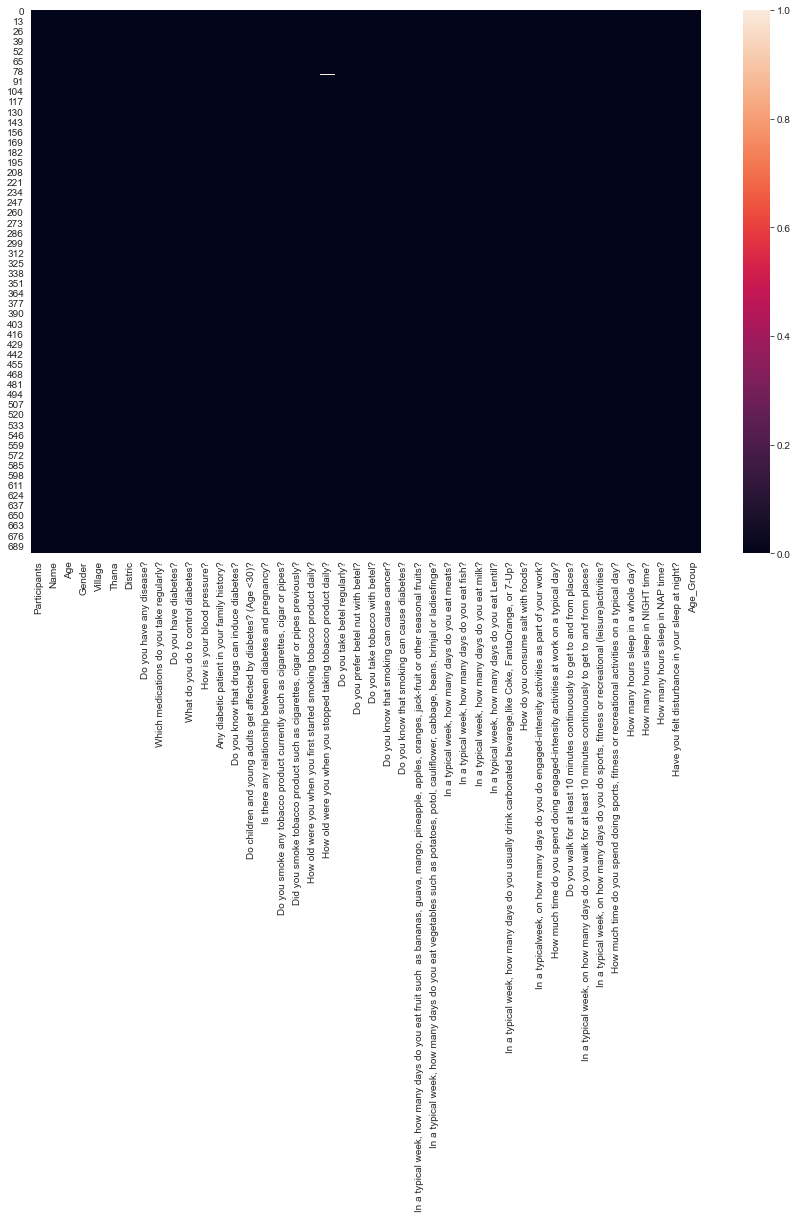

In [9]:
# check missing data 
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull()) 
plt.show()

### Comment-1
Thre is no missing values in this dataset. 

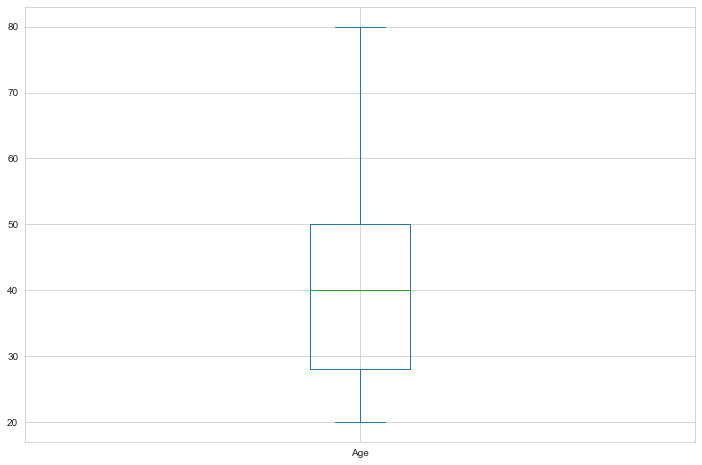

In [40]:
# check outliers
plt.figure(figsize=(12,8))
df.Age.plot(kind='box')
plt.show()

### Comment-2
No outliers found

In [41]:
# Export clean data 
df.to_csv('diabetes_survey.csv', index=False)

# Results 

In [10]:
# read clean data 
data = pd.read_csv('diabetes_survey.csv')
data.head() 

,Participants,Name,Age,Gender,Village,Thana,Distric,Do you have any disease?,Which medications do you take regularly?,Do you have diabetes?,...,How much time do you spend doing engaged-intensity activities at work on a typical day?,Do you walk for at least 10 minutes continuously to get to and from places?,"In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?","In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?","How much time do you spend doing sports, fitness or recreational activities on a typical day?",How many hours sleep in a whole day?,How many hours sleep in NIGHT time?,How many hours sleep in NAP time?,Have you felt disturbance in your sleep at night?,Age_Group
0,1,Akbar mondol,70,Male,Shablat,Shalikha,Magura,No,No,No,...,0,Yes,3,0,0,6,6,0,No,66 and above
1,2,Momena khatun,65,Female,Shablat,Shalikha,Magura,"Asthama, CVD",No,No,...,0,No,0,0,0,8,8,0,No,51-65
2,3,Ratna khatun,35,Female,Shablat,Shalikha,Magura,No,No,No,...,6,Yes,7,0,0,6,6,0,No,16-35
3,4,Saijoddi rahman,38,Male,Shablat,Shalikha,Magura,No,No,No,...,5,Yes,7,0,0,7,7,0,No,36-50
4,5,Uzzal,32,Female,Shablat,Shalikha,Magura,Night fever,No,No,...,5,Yes,7,0,0,6,6,0,No,16-35


## #1: Demographic Summary

In [11]:
# summary of age
rp.codebook(data['Age'])

Variable: Age    Data Type: int64 

 Number of Obs.: 700 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 50 

 Range: [20, 80] 
 Mean: 39.89 
 Standard Deviation: 13.46 
 Mode: 50 
 10th Percentile: 24.0 
 25th Percentile: 28.0 
 50th Percentile: 40.0 
 75th Percentile: 50.0 
 90th Percentile: 60.0 







In [12]:
# summary of demographics 
rp.summary_cat(df[['Gender', 'Age_Group', 'Village', 'Thana', 'Distric']])

,Variable,Outcome,Count,Percent
0,Gender,Male,438,62.57
1,,Female,262,37.43
2,Age_Group,16-35,307,43.86
3,,36-50,266,38.00
4,,51-65,98,14.00
5,,66 and above,29,4.14
6,Village,Tilkhari,219,31.29
7,,Singra,205,29.29
8,,Dhawkhali,135,19.29
9,,Shablat,82,11.71


## #2: Disease conditions 

In [17]:
disease_conditions = data['Do you have any disease?'].str.get_dummies(sep=',')

In [18]:
rp.summary_cat(disease_conditions)

,Variable,Outcome,Count,Percent
0,Arthritis,0,697,99.57
1,,1,3,0.43
2,Asthama,0,698,99.71
3,,1,2,0.29
4,CVD,0,696,99.43
5,,1,4,0.57
6,Diabetes,0,698,99.71
7,,1,2,0.29
8,Gastric,0,699,99.86
9,,1,1,0.14


In [21]:
medications = data['Which medications do you take regularly?'].str.get_dummies(sep=',')

In [22]:
rp.summary_cat(medications)

,Variable,Outcome,Count,Percent
0,PPI,0,698,99.71
1,,1,2,0.29
2,Anti-diabetic,0,672,96.00
3,,1,28,4.00
4,Anti-epileptic,0,699,99.86
5,,1,1,0.14
6,Anti-histamine,0,690,98.57
7,,1,10,1.43
8,Arthritis,0,699,99.86
9,,1,1,0.14


In [19]:
rp.summary_cat(data[[
        'Do you have diabetes?', 
        'What do you do to control diabetes?',
        'How is your blood pressure?',
        'Any diabetic patient in your family history?',
        ]])

,Variable,Outcome,Count,Percent
0,Do you have diabetes?,No,665,95.00
1,,Yes,35,5.00
2,What do you do to control diabetes?,No,665,95.00
3,,Medication,20,2.86
4,,"Medication, exercise",8,1.14
5,,Insulin,7,1.00
6,How is your blood pressure?,No.,622,88.86
7,,L,53,7.57
8,,H,25,3.57
9,Any diabetic patient in your family history?,No,631,90.14


## #3 Intake of tobacco products

In [47]:
rp.summary_cat(data[['Do you smoke any tobacco product currently such as cigarettes, cigar or pipes?',
       'Did you smoke tobacco product such as cigarettes, cigar or pipes previously?',
       'Do you take betel regularly?', 
        'Do you prefer betel nut with betel?',
       'Do you take tobacco with betel?',
       ]])

,Variable,Outcome,Count,Percent
0,Do you smoke any tobacco product currently suc...,No,562,80.29
1,,Yes,138,19.71
2,Did you smoke tobacco product such as cigarett...,No,625,89.29
3,,Yes,75,10.71
4,Do you take betel regularly?,No,663,94.71
5,,Yes,37,5.29
6,Do you prefer betel nut with betel?,No,664,94.86
7,,Yes,36,5.14
8,Do you take tobacco with betel?,No,664,94.86
9,,Yes,36,5.14


## #4 Dietary habit,

In [51]:
rp.summary_cont(data[['In a typical week, how many days do you eat fruit such  as bananas, guava, mango, pineapple, apples, oranges, jack-fruit or other seasonal fruits?',
       'In a typical week, how many days do you eat vegetables such as potatoes, potol, cauliflower, cabbage, beans, brinjal or ladiesfinge?',
       'In a typical week, how many days do you eat meats?',
       'In a typical week, how many days do you eat fish?',
       'In a typical week, how many days do you eat milk?',
       'In a typical week, how many days do you eat Lentil?',
       'In a typical week, how many days do you usually drink carbonated bevarege,like Coke, FantaOrange, or 7-Up?',
       ]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,"In a typical week, how many days do you eat fr...",700.0,2.6057,1.3304,0.0503,2.5070,2.7044
1,"In a typical week, how many days do you eat ve...",699.0,6.7711,0.5263,0.0199,6.7320,6.8102
2,"In a typical week, how many days do you eat me...",700.0,1.1914,0.9360,0.0354,1.1220,1.2609
3,"In a typical week, how many days do you eat fish?",700.0,5.8814,1.4458,0.0546,5.7741,5.9887
4,"In a typical week, how many days do you eat milk?",700.0,2.4929,2.7455,0.1038,2.2891,2.6966
5,"In a typical week, how many days do you eat Le...",700.0,1.4143,1.3134,0.0496,1.3168,1.5118
6,"In a typical week, how many days do you usuall...",700.0,0.3700,0.8535,0.0323,0.3067,0.4333


In [52]:
rp.summary_cat(data['How do you consume salt with foods?'])

,Variable,Outcome,Count,Percent
0,How do you consume salt with foods?,Male,305,43.57
1,,No,155,22.14
2,,L,141,20.14
3,,H,99,14.14


## #5 Physical activity

In [4]:
rp.summary_cont(df[['In a typicalweek, on how many days do you do engaged-intensity activities as part of your work?',
       'How much time do you spend doing engaged-intensity activities at work on a typical day?',
       'Do you walk for at least 10 minutes continuously to get to and from places?',
       'In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?',
       'In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?',
       'How much time do you spend doing sports, fitness or recreational activities on a typical day?'
   ]])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [14]:
df[['In a typicalweek, on how many days do you do engaged-intensity activities as part of your work?',
       'How much time do you spend doing engaged-intensity activities at work on a typical day?',
       'Do you walk for at least 10 minutes continuously to get to and from places?',
       'In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?',
       'In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?',
       'How much time do you spend doing sports, fitness or recreational activities on a typical day?'
   ]].describe().T   

,count,mean,std,min,25%,50%,75%,max
"In a typicalweek, on how many days do you do engaged-intensity activities as part of your work?",700.0,4.662857,2.962434,0.0,2.0,7.0,7.0,7.0
"In a typical week, on how many days do you walk for at least 10 minutes continuously to get to and from places?",700.0,3.748571,2.975760,0.0,0.0,5.0,7.0,7.0
"In a typical week, on how many days do you do sports, fitness or recreational (leisure)activities?",700.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
"How much time do you spend doing sports, fitness or recreational activities on a typical day?",700.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## #6 Sleep Pattern


In [5]:
rp.summary_cat(df['Have you felt disturbance in your sleep at night?'])

,Variable,Outcome,Count,Percent
0,Have you felt disturbance in your sleep at night?,N,580,82.86
1,,Y,120,17.14


In [6]:
df[['How many hours sleep in a whole day?',
       'How many hours sleep in NIGHT time?',
       'How many hours sleep in NAP time?',
       ]].describe().T 

,count,mean,std,min,25%,50%,75%,max
How many hours sleep in a whole day?,700.0,7.568571,1.241687,2.0,7.0,8.0,8.0,11.0
How many hours sleep in NIGHT time?,700.0,7.285714,1.186993,0.0,7.0,7.0,8.0,10.0
How many hours sleep in NAP time?,700.0,0.275714,0.575846,0.0,0.0,0.0,0.0,2.0


In [7]:
rp.summary_cont(df[['How many hours sleep in a whole day?',
       'How many hours sleep in NIGHT time?',
       'How many hours sleep in NAP time?',
       ]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,How many hours sleep in a whole day?,700.0,7.5686,1.2417,0.0469,7.4764,7.6607
1,How many hours sleep in NIGHT time?,700.0,7.2857,1.1870,0.0449,7.1976,7.3738
2,How many hours sleep in NAP time?,700.0,0.2757,0.5758,0.0218,0.2330,0.3184


## Knowledge

In [24]:
rp.summary_cat(df[[
        'Do you know that drugs can induce diabetes?',
        'Do children and young adults get affected by diabetes? (Age <30)?',
        'Is there any relationship between diabetes and pregnancy?', 
        'Do you know that smoking can cause cancer?',
        'Do you know that smoking can cause diabetes?'
        ]])

,Variable,Outcome,Count,Percent
0,Do you know that drugs can induce diabetes?,No,634,90.57
1,,Yes,66,9.43
2,Do children and young adults get affected by d...,No,623,89.00
3,,Yes,77,11.00
4,Is there any relationship between diabetes and...,No,563,80.43
5,,Yes,137,19.57
6,Do you know that smoking can cause cancer?,Yes,698,99.71
7,,No,2,0.29
8,Do you know that smoking can cause diabetes?,No,664,94.86
9,,Yes,36,5.14
